# CO2-fe emissions run comparison of MAGICC6 and FaIR

### First reproduce plot of temperature and concentrations of CO2, CH4 and N2O to check I understand how to run magicc with a scenario.

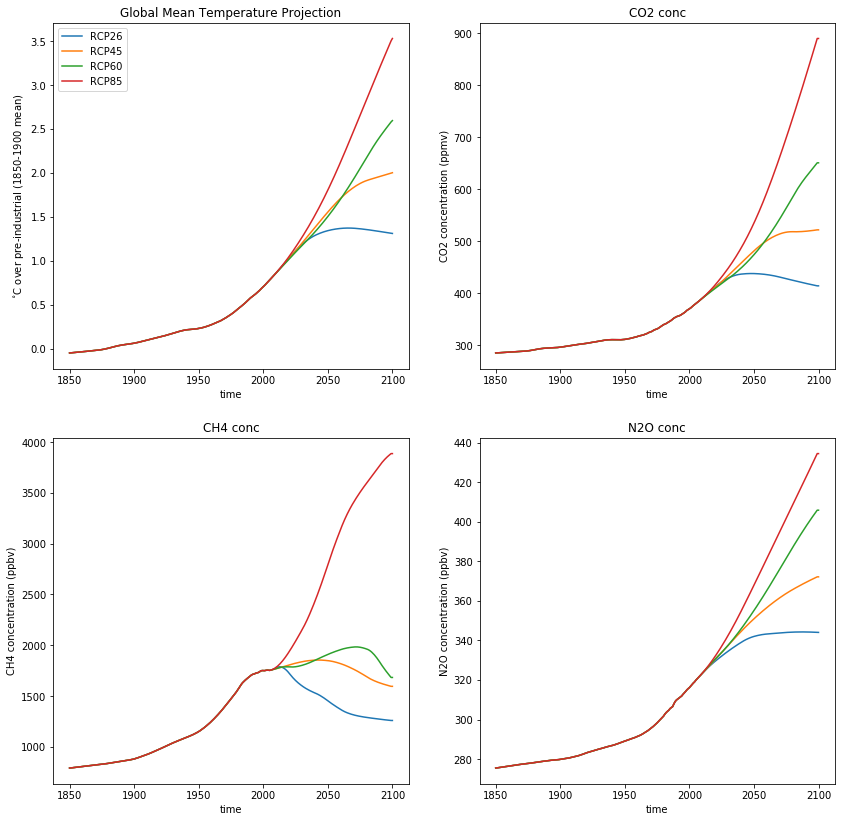

In [1]:
import matplotlib
# matplotlib.use("TkAgg")

from Support_codes.fair_scm import *
from Support_codes.temperature_import_and_baseline import *

from matplotlib import pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

import pymagicc
from pymagicc import scenarios

figure_1 = plt.figure(figsize=(14,14))
ax1 = figure_1.add_subplot(221)
ax2 = figure_1.add_subplot(222)
ax3 = figure_1.add_subplot(223)
ax4 = figure_1.add_subplot(224)


for name, scen in scenarios.items():

    results = pymagicc.run(scen, RF_TOTAL_RUNMODUS = "CO2")

#     print(results.keys())
    
    results_df = results.df
    results_df.set_index("time", inplace=True)
    
    global_temp_time_rows = ((results_df.variable == "Surface Temperature") & (results_df.region == "World"))
    
    temp = (results_df.value[global_temp_time_rows].loc[1850:] - results_df.value[global_temp_time_rows].loc[1850:1900].mean())
    temp.plot(label=name, ax = ax1)
    
    global_co2_conc_time_rows = ((results_df.variable == "Atmospheric Concentrations|CO2") & (results_df.region == "World"))
    
    co2_conc = (results_df.value[global_co2_conc_time_rows].loc[1850:])
    co2_conc.plot(label=name, ax = ax2)
    
    global_ch4_conc_time_rows = ((results_df.variable == "Atmospheric Concentrations|CH4") & (results_df.region == "World"))
    
    ch4_conc = (results_df.value[global_ch4_conc_time_rows].loc[1850:])
    ch4_conc.plot(label=name, ax = ax3)
    
    global_n2o_conc_time_rows = ((results_df.variable == "Atmospheric Concentrations|N2O") & (results_df.region == "World"))
    
    n2o_conc = (results_df.value[global_n2o_conc_time_rows].loc[1850:])
    n2o_conc.plot(label=name, ax = ax4)


ax1.set_title("Global Mean Temperature Projection")
ax1.set_ylabel("$^{\circ}$C over pre-industrial (1850-1900 mean)")
ax1.legend(loc="best")

ax2.set_title("CO2 conc")
ax2.set_ylabel("CO2 concentration (ppmv)")

ax3.set_title("CH4 conc")
ax3.set_ylabel("CH4 concentration (ppbv)")

ax4.set_title("N2O conc")
ax4.set_ylabel("N2O concentration (ppbv)")

plt.show()

# Run MAGICC6 over custom scenario

['Emissions|CO2|MAGICC Fossil and Industrial' 'Emissions|CO2|MAGICC AFOLU'
 'Emissions|CH4' 'Emissions|N2O' 'Emissions|SOx' 'Emissions|CO'
 'Emissions|NMVOC' 'Emissions|NOx' 'Emissions|BC' 'Emissions|OC'
 'Emissions|NH3' 'Emissions|CF4' 'Emissions|C2F6' 'Emissions|C6F14'
 'Emissions|HFC23' 'Emissions|HFC32' 'Emissions|HFC4310'
 'Emissions|HFC125' 'Emissions|HFC134a' 'Emissions|HFC143a'
 'Emissions|HFC227ea' 'Emissions|HFC245fa' 'Emissions|SF6']
1765         0.01
1766    0.0102916
1767    0.0105918
1768    0.0109007
1769    0.0112186
1770    0.0115458
1771    0.0118825
1772     0.012229
1773    0.0125857
1774    0.0129527
1775    0.0133304
1776    0.0137192
1777    0.0141193
1778    0.0145311
1779    0.0149549
1780     0.015391
1781    0.0158399
1782    0.0163018
1783    0.0167772
1784    0.0172665
1785    0.0177701
1786    0.0182883
1787    0.0188217
1788    0.0193706
1789    0.0199355
1790    0.0205169
1791    0.0211153
1792    0.0217311
1793    0.0223648
1794    0.0230171
          .

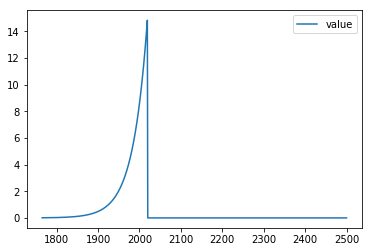

In [41]:
# slice_vals = ((scenarios['RCP26'].variable == "Emissions|CO2|MAGICC Fossil and Industrial") & (scenarios['RCP26'].region == "World"))

# print(scenarios['RCP26'].values[slice_vals])
# print(scenarios['RCP26'].variable.unique())

test_scen2 = scenarios['RCP26'].copy()
print(test_scen2.variable.unique())

test_scen2.reindex()

test_scen = pd.DataFrame(columns=scenarios['RCP26'].columns,index=np.arange(1765,2501))

test_scen.variable.loc[1765:] = 'Emissions|CO2|MAGICC AFOLU'
test_scen.variable.loc[1765:] = 'Emissions|CH4'
test_scen.variable.loc[1765:] = 'Emissions|N2O'
test_scen.variable.loc[1765:] = 'Emissions|CO2|MAGICC Fossil and Industrial'
test_scen.region.loc[1765:] = 'World'

slice_vals = ((test_scen.variable == "Emissions|CO2|MAGICC Fossil and Industrial") & (test_scen.region == "World"))

# test_scen.value[slice_vals].loc[1765:] = np.arange(0.01,30,(30-0.01)/(2501-1765))

co2_test_ems = 0.01 * np.exp(np.log(1500000000) * np.arange(0,2501-1765) / (2500-1765))
co2_test_ems[2020-1765:] = 0.0

test_scen.value[slice_vals] = co2_test_ems

print(test_scen.value[slice_vals].loc[1765:])

test_scen2 = test_scen.value[slice_vals]

pd.DataFrame(test_scen2).plot()

plt.show()

In [39]:
result_test = pymagicc.run(pd.DataFrame(test_scen), RF_TOTAL_RUNMODUS = "CO2", CO2_SWITCHFROMCONC2EMIS_YEAR =  1765, CORE_CLIMATESENSITIVITY = 3.0)

# pd.DataFrame(result_test['SURFACE_TEMP']['GLOBAL']).plot()

temp_rel_1850_1900 = pd.DataFrame(result_test['SURFACE_TEMP']['GLOBAL']).loc[1850:] - pd.DataFrame(result_test['SURFACE_TEMP']['GLOBAL']).loc[1850:1900].mean()

temp_rel_1850_1900.plot()

plt.show()

# Now try and input my CO2-fe emissions whilst setting climate sensitivity

AttributeError: 'DataFrame' object has no attribute 'write'

In [27]:
grey_co2_fe_dat = np.genfromtxt('grey_co2_fe.txt', delimiter=',')
blue_co2_fe_dat = np.genfromtxt('blue_co2_fe.txt', delimiter=',')
purple_co2_fe_dat = np.genfromtxt('purple_co2_fe.txt', delimiter=',')

In [28]:
grey_1_scen = pd.DataFrame(columns=scenarios['RCP26']['WORLD'].columns,index=np.arange(1765,2501))
grey_1_scen['FossilCO2'] = grey_co2_fe_dat[1]

grey_1_co2_fe_scen = grey_1_scen['FossilCO2']

pd.DataFrame(grey_1_co2_fe_scen).plot()

plt.show()


grey_0_scen = pd.DataFrame(columns=scenarios['RCP26']['WORLD'].columns,index=np.arange(1765,2501))
grey_0_scen['FossilCO2'] = grey_co2_fe_dat[0]

grey_0_co2_fe_scen = grey_0_scen['FossilCO2']


grey_2_scen = pd.DataFrame(columns=scenarios['RCP26']['WORLD'].columns,index=np.arange(1765,2501))
grey_2_scen['FossilCO2'] = grey_co2_fe_dat[2]

grey_2_co2_fe_scen = grey_2_scen['FossilCO2']




blue_0_scen = pd.DataFrame(columns=scenarios['RCP26']['WORLD'].columns,index=np.arange(1765,2501))
blue_0_scen['FossilCO2'] = blue_co2_fe_dat[0]

blue_0_co2_fe_scen = blue_0_scen['FossilCO2']

blue_1_scen = pd.DataFrame(columns=scenarios['RCP26']['WORLD'].columns,index=np.arange(1765,2501))
blue_1_scen['FossilCO2'] = blue_co2_fe_dat[1]

blue_1_co2_fe_scen = blue_1_scen['FossilCO2']

blue_2_scen = pd.DataFrame(columns=scenarios['RCP26']['WORLD'].columns,index=np.arange(1765,2501))
blue_2_scen['FossilCO2'] = blue_co2_fe_dat[2]

blue_2_co2_fe_scen = blue_2_scen['FossilCO2']




purple_0_scen = pd.DataFrame(columns=scenarios['RCP26']['WORLD'].columns,index=np.arange(1765,2501))
purple_0_scen['FossilCO2'] = purple_co2_fe_dat[0]

purple_0_co2_fe_scen = purple_0_scen['FossilCO2']

purple_1_scen = pd.DataFrame(columns=scenarios['RCP26']['WORLD'].columns,index=np.arange(1765,2501))
purple_1_scen['FossilCO2'] = purple_co2_fe_dat[1]

purple_1_co2_fe_scen = purple_1_scen['FossilCO2']

purple_2_scen = pd.DataFrame(columns=scenarios['RCP26']['WORLD'].columns,index=np.arange(1765,2501))
purple_2_scen['FossilCO2'] = purple_co2_fe_dat[2]

purple_2_co2_fe_scen = purple_2_scen['FossilCO2']

RecursionError: maximum recursion depth exceeded

In [29]:
result_grey_1 = pymagicc.run(pd.DataFrame(grey_1_co2_fe_scen), RF_TOTAL_RUNMODUS = "CO2", CO2_SWITCHFROMCONC2EMIS_YEAR =  1765, CORE_CLIMATESENSITIVITY = 2.51)
result_grey_0 = pymagicc.run(pd.DataFrame(grey_0_co2_fe_scen), RF_TOTAL_RUNMODUS = "CO2", CO2_SWITCHFROMCONC2EMIS_YEAR =  1765, CORE_CLIMATESENSITIVITY = 1.22)
result_grey_2 = pymagicc.run(pd.DataFrame(grey_2_co2_fe_scen), RF_TOTAL_RUNMODUS = "CO2", CO2_SWITCHFROMCONC2EMIS_YEAR =  1765, CORE_CLIMATESENSITIVITY = 4.48)

grey_1_temp_rel_1850_1900 = pd.DataFrame(result_grey_1['SURFACE_TEMP']['GLOBAL']).loc[1765:] - pd.DataFrame(result_grey_1['SURFACE_TEMP']['GLOBAL']).loc[1850:1900].mean()
grey_0_temp_rel_1850_1900 = pd.DataFrame(result_grey_0['SURFACE_TEMP']['GLOBAL']).loc[1765:] - pd.DataFrame(result_grey_0['SURFACE_TEMP']['GLOBAL']).loc[1850:1900].mean()
grey_2_temp_rel_1850_1900 = pd.DataFrame(result_grey_2['SURFACE_TEMP']['GLOBAL']).loc[1765:] - pd.DataFrame(result_grey_2['SURFACE_TEMP']['GLOBAL']).loc[1850:1900].mean()


result_blue_1 = pymagicc.run(pd.DataFrame(blue_1_co2_fe_scen), RF_TOTAL_RUNMODUS = "CO2", CO2_SWITCHFROMCONC2EMIS_YEAR =  1765, CORE_CLIMATESENSITIVITY = 2.51)
result_blue_0 = pymagicc.run(pd.DataFrame(blue_0_co2_fe_scen), RF_TOTAL_RUNMODUS = "CO2", CO2_SWITCHFROMCONC2EMIS_YEAR =  1765, CORE_CLIMATESENSITIVITY = 1.22)
result_blue_2 = pymagicc.run(pd.DataFrame(blue_2_co2_fe_scen), RF_TOTAL_RUNMODUS = "CO2", CO2_SWITCHFROMCONC2EMIS_YEAR =  1765, CORE_CLIMATESENSITIVITY = 4.48)

blue_1_temp_rel_1850_1900 = pd.DataFrame(result_blue_1['SURFACE_TEMP']['GLOBAL']).loc[1765:] - pd.DataFrame(result_blue_1['SURFACE_TEMP']['GLOBAL']).loc[1850:1900].mean()
blue_0_temp_rel_1850_1900 = pd.DataFrame(result_blue_0['SURFACE_TEMP']['GLOBAL']).loc[1765:] - pd.DataFrame(result_blue_0['SURFACE_TEMP']['GLOBAL']).loc[1850:1900].mean()
blue_2_temp_rel_1850_1900 = pd.DataFrame(result_blue_2['SURFACE_TEMP']['GLOBAL']).loc[1765:] - pd.DataFrame(result_blue_2['SURFACE_TEMP']['GLOBAL']).loc[1850:1900].mean()


result_purple_1 = pymagicc.run(pd.DataFrame(purple_1_co2_fe_scen), RF_TOTAL_RUNMODUS = "CO2", CO2_SWITCHFROMCONC2EMIS_YEAR =  1765, CORE_CLIMATESENSITIVITY = 2.51)
result_purple_0 = pymagicc.run(pd.DataFrame(purple_0_co2_fe_scen), RF_TOTAL_RUNMODUS = "CO2", CO2_SWITCHFROMCONC2EMIS_YEAR =  1765, CORE_CLIMATESENSITIVITY = 1.22)
result_purple_2 = pymagicc.run(pd.DataFrame(purple_2_co2_fe_scen), RF_TOTAL_RUNMODUS = "CO2", CO2_SWITCHFROMCONC2EMIS_YEAR =  1765, CORE_CLIMATESENSITIVITY = 4.48)

purple_1_temp_rel_1850_1900 = pd.DataFrame(result_purple_1['SURFACE_TEMP']['GLOBAL']).loc[1765:] - pd.DataFrame(result_purple_1['SURFACE_TEMP']['GLOBAL']).loc[1850:1900].mean()
purple_0_temp_rel_1850_1900 = pd.DataFrame(result_purple_0['SURFACE_TEMP']['GLOBAL']).loc[1765:] - pd.DataFrame(result_purple_0['SURFACE_TEMP']['GLOBAL']).loc[1850:1900].mean()
purple_2_temp_rel_1850_1900 = pd.DataFrame(result_purple_2['SURFACE_TEMP']['GLOBAL']).loc[1765:] - pd.DataFrame(result_purple_2['SURFACE_TEMP']['GLOBAL']).loc[1850:1900].mean()


fig_co2_fe_SPM, ax_co2_fe_SPM = plt.subplots()
ax_co2_fe_SPM.axhline(y=1.5, color='black', linewidth = 1.0, alpha=0.2, linestyle=':')
ax_co2_fe_SPM.axhline(y=0.0, color='black', linewidth = 1.0, alpha=0.5, linestyle='-')
ax_co2_fe_SPM.plot(np.array([2018,2018]),np.array([-1.0,1.02]), color='black', linewidth=1.0, linestyle='--', alpha=0.3)
ax_co2_fe_SPM.plot(np.array([1850,2018]),np.array([1.0,1.0]), color='black', linewidth=1.0, linestyle='--', alpha=0.3)

# print(grey_0_temp_rel_1850_1900['GLOBAL'])

# grey_1_temp_rel_1850_1900.plot(ax = ax_co2_fe_SPM)
# grey_0_temp_rel_1850_1900.plot(ax = ax_co2_fe_SPM)
# grey_2_temp_rel_1850_1900.plot(ax = ax_co2_fe_SPM)





grey_temp_dat = np.genfromtxt('SPM_temp_responses_grey.txt', delimiter='\t', skip_header=1)
blue_temp_dat = np.genfromtxt('SPM_temp_responses_blue.txt', delimiter='\t', skip_header=1)
purple_temp_dat = np.genfromtxt('SPM_temp_responses_purple.txt', delimiter='\t', skip_header=1)

# ax_co2_fe_SPM.fill_between(np.arange(2018,2101), grey_temp_dat[2018-1765:2101-1765,1], grey_temp_dat[2018-1765:2101-1765,3], color="grey", alpha=0.3, label='FaIR response to CO2-fe ems')#, hatch='X')
# ax_co2_fe_SPM.fill_between(np.arange(2018,2101), blue_temp_dat[2018-1765:2101-1765,1], blue_temp_dat[2018-1765:2101-1765,3], color="blue", alpha=0.15)#, hatch='X')
# ax_co2_fe_SPM.fill_between(np.arange(2018,2101), purple_temp_dat[2018-1765:2101-1765,1], purple_temp_dat[2018-1765:2101-1765,3], color="red", alpha=0.15)#, hatch='X')

ax_co2_fe_SPM.fill_between(np.arange(2018,2101), grey_temp_dat[2018-1765:2101-1765,1], grey_temp_dat[2018-1765:2101-1765,3], color="grey", alpha=0.3, label='FaIR response to CO2-fe ems')#, hatch='X')
ax_co2_fe_SPM.fill_between(np.arange(2018,2101), blue_temp_dat[2018-1765:2101-1765,1], blue_temp_dat[2018-1765:2101-1765,3], color="blue", alpha=0.15)#, hatch='X')
ax_co2_fe_SPM.fill_between(np.arange(2018,2101), purple_temp_dat[2018-1765:2101-1765,1], purple_temp_dat[2018-1765:2101-1765,3], color="red", alpha=0.15)#, hatch='X')

plt.ylim(0,3)
plt.xlim(1960,2100)




# -------------
# use main code to add historical temperature record
def load_colpal():
    rgb_list = np.array([[213,94,0]]) / 255.
    rgb_names = ['vermillion']
    rgbs = {rgb_names[x]:tuple(rgb_list[x]) for x in range(0,len(rgb_list))}
    return rgbs
cols = load_colpal()
    
# Define gmst dataset names
gmst_names = ['HadCRUT4','GISTEMP','NOAA','Cowtan-Way']
# define the baseline year range, and common reference range
base_low=1850.
base_high=1900.
# define variable representing frequency of temp. observations ('mon' = monthly)
temp_freq='mon'
# ----------------------------------------------------



# Import the datasets (HadCRUT4, HadCRUT4-CW, NOAA and GISTEMP) into dictionary 'gmst'
gmst = temp_import()
# Find min, max and mean of temperature observation datasets
gmst = calc_mean_min_max(gmst)
# calculate the AWI and NWI for each GMST dataset relative to the baseperiod and also for the mean of the datasets 
for key in gmst_names:
    awi, nwi = calc_gwi(gmst[key]['Temp'],gmst[key]['Years'],reg_type=temp_freq,
                        base_low=base_low,base_high=base_high, name=key)
    # express AWI and NWI relative the mid-point of the period
    gmst[key]['AWI'] = awi 
    gmst[key]['NWI'] = nwi 

# calculte for the mean of the datasets
awi, nwi = calc_gwi(gmst['Temp-mean'],gmst['HadCRUT4']['Years'],reg_type=temp_freq,
                    base_low=base_low,base_high=base_high, name='Mean temp.')
gmst['Temp-mean-AWI'] = awi 
gmst['Temp-mean-NWI'] = nwi

# -------------

ax_co2_fe_SPM.fill_between(gmst['HadCRUT4']['Years'],gmst['Temp-max'],gmst['Temp-min'],
                     color='grey',alpha=0.3)
ax_co2_fe_SPM.plot(gmst['HadCRUT4']['Years'],np.array(gmst['Temp-mean']),color='grey',
             linestyle='-',linewidth=1, alpha = 0.4)
ax_co2_fe_SPM.plot(gmst['HadCRUT4']['Years'], gmst['Temp-mean-AWI'], color=cols['vermillion'],
             linestyle='-', linewidth=2)
ax_co2_fe_SPM.fill_between(gmst['HadCRUT4']['Years'],gmst['Temp-mean-AWI']*(1.2),
                 gmst['Temp-mean-AWI']*(0.8),color=cols['vermillion'],
                 alpha=0.4,linewidth=0)

warm_end = np.mean(gmst['Temp-mean-AWI'][np.logical_and(np.array(gmst['HadCRUT4']['Years'])>=2017,
                                                            np.array(gmst['HadCRUT4']['Years'])<2018)])

ax_co2_fe_SPM.scatter(2017.5,warm_end,s=20,color=cols['vermillion'],zorder=20)




ax_co2_fe_SPM.fill_between(np.arange(1765,2101), grey_0_temp_rel_1850_1900['GLOBAL'].loc[1765:], grey_2_temp_rel_1850_1900['GLOBAL'].loc[1765:], facecolor="none", edgecolor="grey", alpha=1, label='MAGICC6 response to CO2-fe ems')#, hatch='X')
ax_co2_fe_SPM.fill_between(np.arange(1765,2101), blue_0_temp_rel_1850_1900['GLOBAL'].loc[1765:], blue_2_temp_rel_1850_1900['GLOBAL'].loc[1765:], facecolor="none", edgecolor="blue", alpha=1)#, hatch='X')
ax_co2_fe_SPM.fill_between(np.arange(1765,2101), purple_0_temp_rel_1850_1900['GLOBAL'].loc[1765:], purple_2_temp_rel_1850_1900['GLOBAL'].loc[1765:], facecolor="none", edgecolor="red", alpha=1)#, hatch='X')





# calculate position and size of error bars used to show extent of grey plume
#----------------------------------------
dy = (grey_2_temp_rel_1850_1900['GLOBAL'].loc[2100] - grey_0_temp_rel_1850_1900['GLOBAL'].loc[2100]) / 2.
y = (grey_2_temp_rel_1850_1900['GLOBAL'].loc[2100] + grey_0_temp_rel_1850_1900['GLOBAL'].loc[2100]) / 2.
e11 = ax_co2_fe_SPM.errorbar(2102, y, yerr=dy, fmt='none', ecolor='grey', alpha=0.8, elinewidth=1.5, capsize=3)
for b in e11[1]:
    b.set_clip_on(False)
for b in e11[2]:
    b.set_clip_on(False)
    
dy = (blue_2_temp_rel_1850_1900['GLOBAL'].loc[2100] - blue_0_temp_rel_1850_1900['GLOBAL'].loc[2100]) / 2.
y = (blue_2_temp_rel_1850_1900['GLOBAL'].loc[2100] + blue_0_temp_rel_1850_1900['GLOBAL'].loc[2100]) / 2.
e11 = ax_co2_fe_SPM.errorbar(2108, y, yerr=dy, fmt='none', ecolor='blue', alpha=0.8, elinewidth=1.5, capsize=3)
for b in e11[1]:
    b.set_clip_on(False)
for b in e11[2]:
    b.set_clip_on(False)
    
dy = (purple_2_temp_rel_1850_1900['GLOBAL'].loc[2100] - purple_0_temp_rel_1850_1900['GLOBAL'].loc[2100]) / 2.
y = (purple_2_temp_rel_1850_1900['GLOBAL'].loc[2100] + purple_0_temp_rel_1850_1900['GLOBAL'].loc[2100]) / 2.
e11 = ax_co2_fe_SPM.errorbar(2114, y, yerr=dy, fmt='none', ecolor='red', alpha=0.8, elinewidth=1.5, capsize=3)
for b in e11[1]:
    b.set_clip_on(False)
for b in e11[2]:
    b.set_clip_on(False)
#----------------------------------------
#----------------------------------------
dy = (grey_temp_dat[2101-1765,3] - grey_temp_dat[2101-1765,1]) / 2.
y = (grey_temp_dat[2101-1765,3] + grey_temp_dat[2101-1765,1]) / 2.
e11 = ax_co2_fe_SPM.errorbar(2104, y, yerr=dy, fmt='none', ecolor='grey', alpha=0.4, elinewidth=3, capsize=0)
for b in e11[1]:
    b.set_clip_on(False)
for b in e11[2]:
    b.set_clip_on(False)
    
dy = (blue_temp_dat[2101-1765,3] - blue_temp_dat[2101-1765,1]) / 2.
y = (blue_temp_dat[2101-1765,3] + blue_temp_dat[2101-1765,1]) / 2.
e11 = ax_co2_fe_SPM.errorbar(2110, y, yerr=dy, fmt='none', ecolor='blue', alpha=0.4, elinewidth=3, capsize=0)
for b in e11[1]:
    b.set_clip_on(False)
for b in e11[2]:
    b.set_clip_on(False)
    
dy = (purple_temp_dat[2101-1765,3] - purple_temp_dat[2101-1765,1]) / 2.
y = (purple_temp_dat[2101-1765,3] + purple_temp_dat[2101-1765,1]) / 2.
e11 = ax_co2_fe_SPM.errorbar(2116, y, yerr=dy, fmt='none', ecolor='red', alpha=0.4, elinewidth=3, capsize=0)
for b in e11[1]:
    b.set_clip_on(False)
for b in e11[2]:
    b.set_clip_on(False)
#----------------------------------------


# add fair response if we use TCR and ECS as MAGICC does and no CC feedback variation
fair_p0_C,fair_p0_T = fair_scm(emissions=purple_co2_fe_dat[0], tcrecs=np.array([1.01,1.23]), d=np.array([409.5,8.4]))
fair_p1_C,fair_p1_T = fair_scm(emissions=purple_co2_fe_dat[1], tcrecs=np.array([1.75,2.51]), d=np.array([409.5,8.4]))
fair_p2_C,fair_p2_T = fair_scm(emissions=purple_co2_fe_dat[2], tcrecs=np.array([2.52,4.42]), d=np.array([409.5,8.4]))

ax_co2_fe_SPM.plot(np.arange(1765,2501), fair_p0_T - np.mean(fair_p0_T[1850-1765:1901-1765]), color='red', linestyle=':')
# ax_co2_fe_SPM.plot(np.arange(1765,2501), fair_p1_T - np.mean(fair_p1_T[1850-1765:1901-1765]), color='red', linestyle=':')
ax_co2_fe_SPM.plot(np.arange(1765,2501), fair_p2_T - np.mean(fair_p2_T[1850-1765:1901-1765]), color='red', linestyle=':')


fair_b0_C,fair_b0_T = fair_scm(emissions=blue_co2_fe_dat[0], tcrecs=np.array([1.01,1.23]), d=np.array([409.5,8.4]))#, r0=46.16, rC=0.0, rT=0.0)
fair_b1_C,fair_b1_T = fair_scm(emissions=blue_co2_fe_dat[1], tcrecs=np.array([1.75,2.51]), d=np.array([409.5,8.4]))
fair_b2_C,fair_b2_T = fair_scm(emissions=blue_co2_fe_dat[2], tcrecs=np.array([2.52,4.42]), d=np.array([409.5,8.4]))#, r0=22.56, rC=0.026, rT=5.802)

ax_co2_fe_SPM.plot(np.arange(1765,2501), fair_b0_T - np.mean(fair_b0_T[1850-1765:1901-1765]), color='blue', linestyle=':')
# ax_co2_fe_SPM.plot(np.arange(1765,2501), fair_b1_T - np.mean(fair_b1_T[1850-1765:1901-1765]), color='blue', linestyle=':')
ax_co2_fe_SPM.plot(np.arange(1765,2501), fair_b2_T - np.mean(fair_b2_T[1850-1765:1901-1765]), color='blue', linestyle=':')


fair_g0_C,fair_g0_T = fair_scm(emissions=grey_co2_fe_dat[0], tcrecs=np.array([1.01,1.23]), d=np.array([409.5,8.4]))
fair_g1_C,fair_g1_T = fair_scm(emissions=grey_co2_fe_dat[1], tcrecs=np.array([1.75,2.51]), d=np.array([409.5,8.4]))
fair_g2_C,fair_g2_T = fair_scm(emissions=grey_co2_fe_dat[2], tcrecs=np.array([2.52,4.42]), d=np.array([409.5,8.4]))

ax_co2_fe_SPM.plot(np.arange(1765,2501), fair_g0_T - np.mean(fair_g0_T[1850-1765:1901-1765]), color='grey', linestyle=':', label='FaIR response (MAGICC params)')
# ax_co2_fe_SPM.plot(np.arange(1765,2501), fair_g1_T - np.mean(fair_g1_T[1850-1765:1901-1765]), color='grey', linestyle=':')
ax_co2_fe_SPM.plot(np.arange(1765,2501), fair_g2_T - np.mean(fair_g2_T[1850-1765:1901-1765]), color='grey', linestyle=':')



ax_co2_fe_SPM.legend(loc='best', edgecolor='none')
plt.xlabel('Years')
plt.ylabel('Temperature relative to 1850-1900 ($^{\circ}$C)')

plt.show()

# fig_co2_fe_SPM.savefig('MAGICC6_CO2_fe_response_comparison.pdf', dpi=300)

NameError: name 'grey_1_co2_fe_scen' is not defined